**IMPORTING LIBRARIES**

**EDA means to understand the data. In this project we will understand the issues of customer churn by perfoming EDA on dataset
and for better understanding we will create visuals**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [7]:
df = pd.read_csv('Customer Churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**INSPECTION OF DATA**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**#replacing blanks with 0 as tenure is 0 and no total charges are done**

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df.duplicated().sum()

0

In [29]:
def conv(value):
    if value ==1 :
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

**Converted 0 and 1 values of senior citizen to yes/no to make it easier**

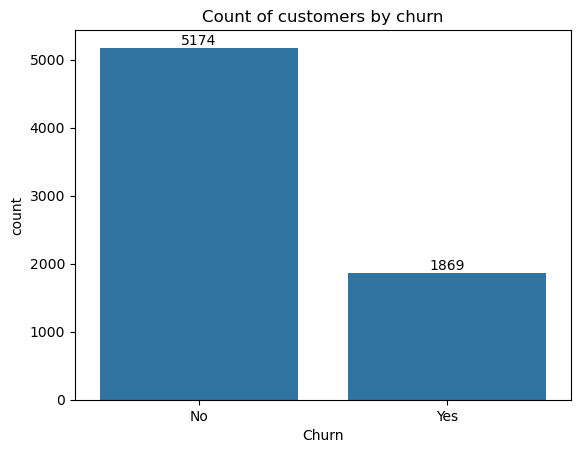

In [60]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

In [41]:
gb = df.groupby("Churn").agg({'Churn': "count"})
gb

,Churn
Churn,
No,5174
Yes,1869


**CREATING A PIE CHART TO CHECK CHURN OF CUSTOMERS**

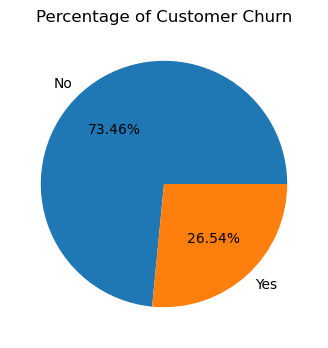

In [68]:
plt.figure(figsize=(5,4))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Customer Churn", fontsize = 12)
plt.show()

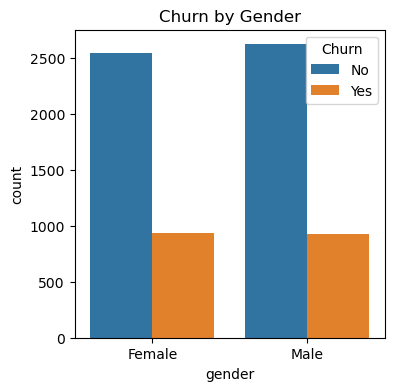

In [80]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title('Churn by Gender')
plt.show()

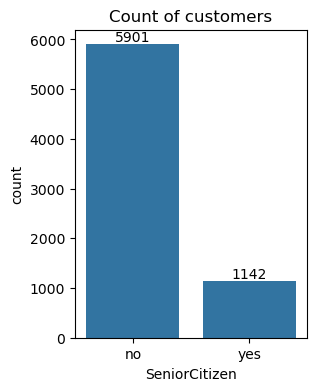

In [90]:
plt.figure(figsize=(3,4))
ax =sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customers')
plt.show()

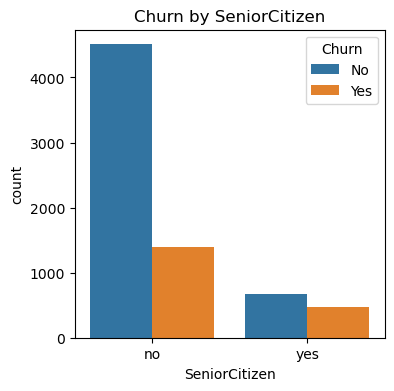

In [84]:
plt.figure(figsize=(4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title('Churn by SeniorCitizen')
plt.show()

**Comparatively a greeated percentage of people in senior citizen category have churned**

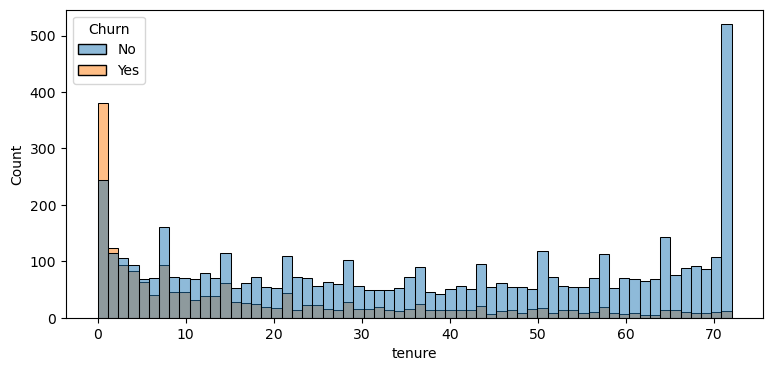

In [97]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins = 62, hue = 'Churn')
plt.show()

**#People who have used our services for a long time have stayed and people who hav used our service for 1 month are churned out**


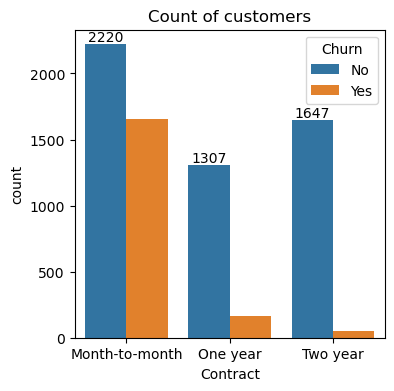

In [105]:
plt.figure(figsize=(4,4))
ax =sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of customers')
plt.show()

**People who   have month to month contract are likely to churn then those who have 1 to 2 years of contract**

In [114]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

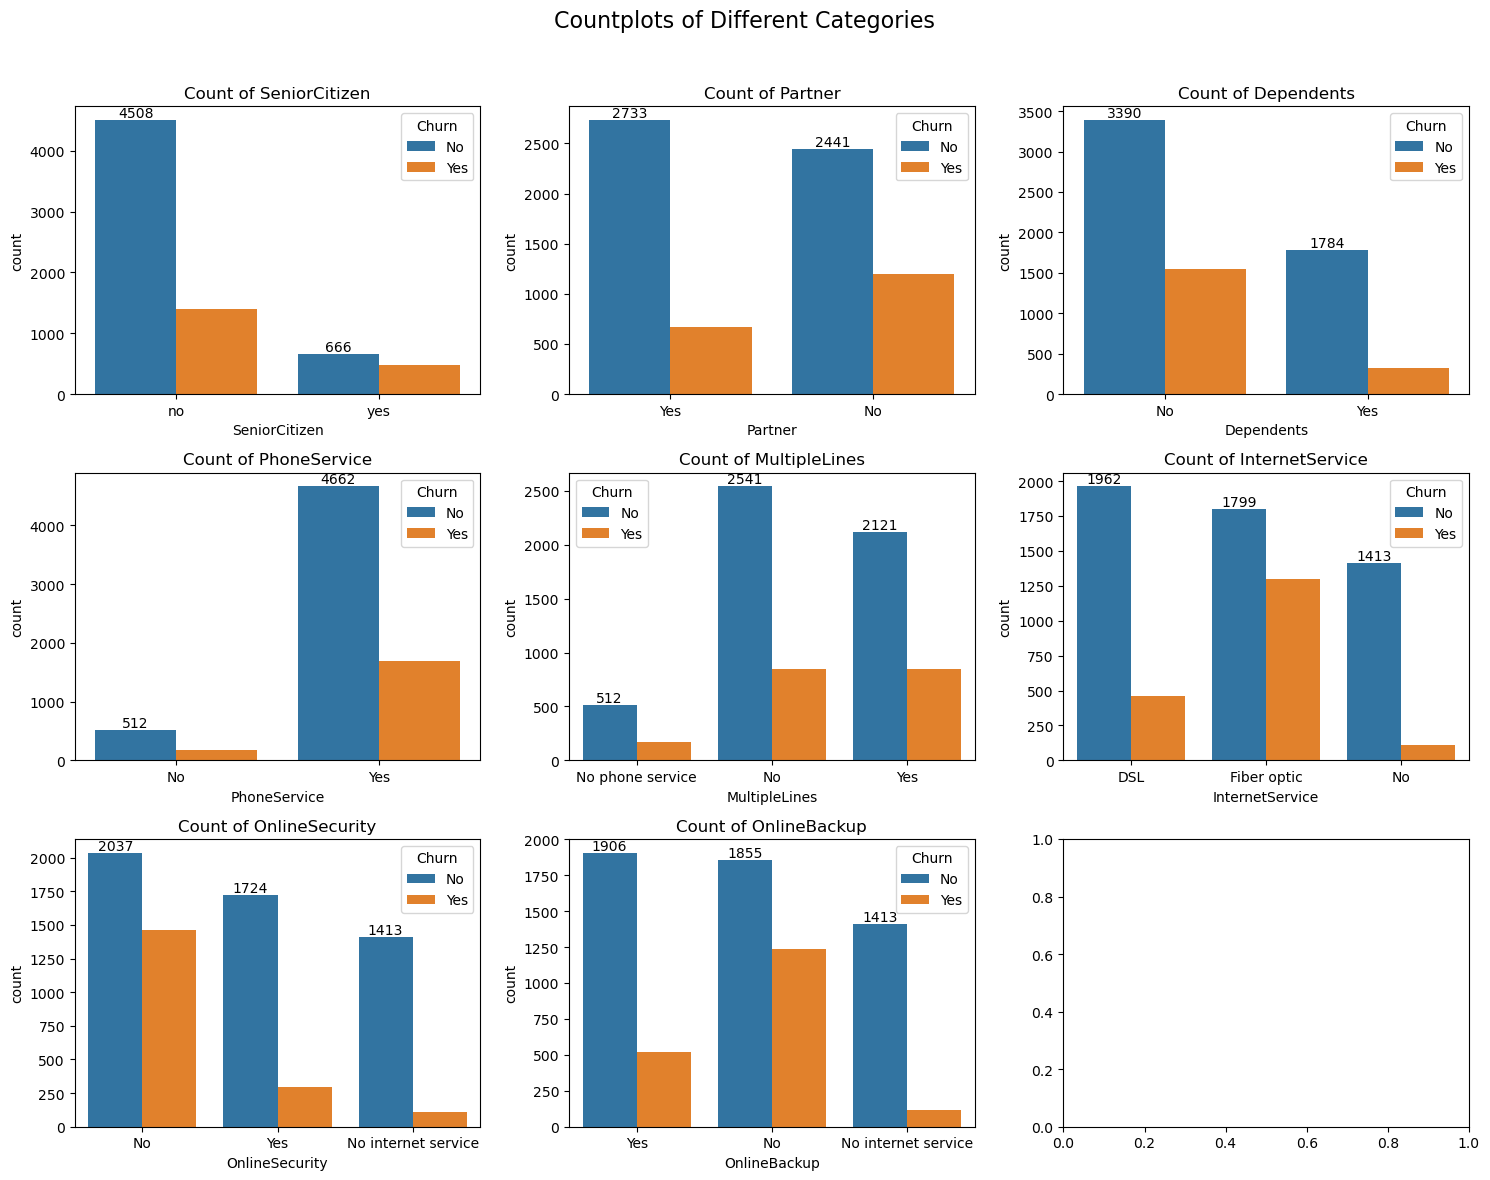

In [132]:

# List of categorical columns to plot
columns = ["SeniorCitizen",  "Partner", "Dependents", "PhoneService", 
           "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup"]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns
fig.suptitle('Countplots of Different Categories', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create countplots
for i, col in enumerate(columns):
    ax = sns.countplot(x=df[col], data=df, ax=axes[i], hue = 'Churn')
    ax.set_title(f'Count of {col}')
    ax.bar_label(ax.containers[0])  # Add labels on bars

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**SUMMARY**

**The data shows that non-senior citizens make up the majority of customers, but senior citizens have a higher churn rate. Customers without partners or dependents are more likely to churn. Phone service is widely used, but those with multiple lines experience higher churn. Fiber optic internet users have a significantly higher churn rate than DSL users. Customers without online security or backup tend to churn more frequently.**








